In [1]:
cd ~/Downloads/Labor_Rechnerübung_zur_Signalübertragung_II/'Versuch 3 - Leistungsdichtespektrum'/

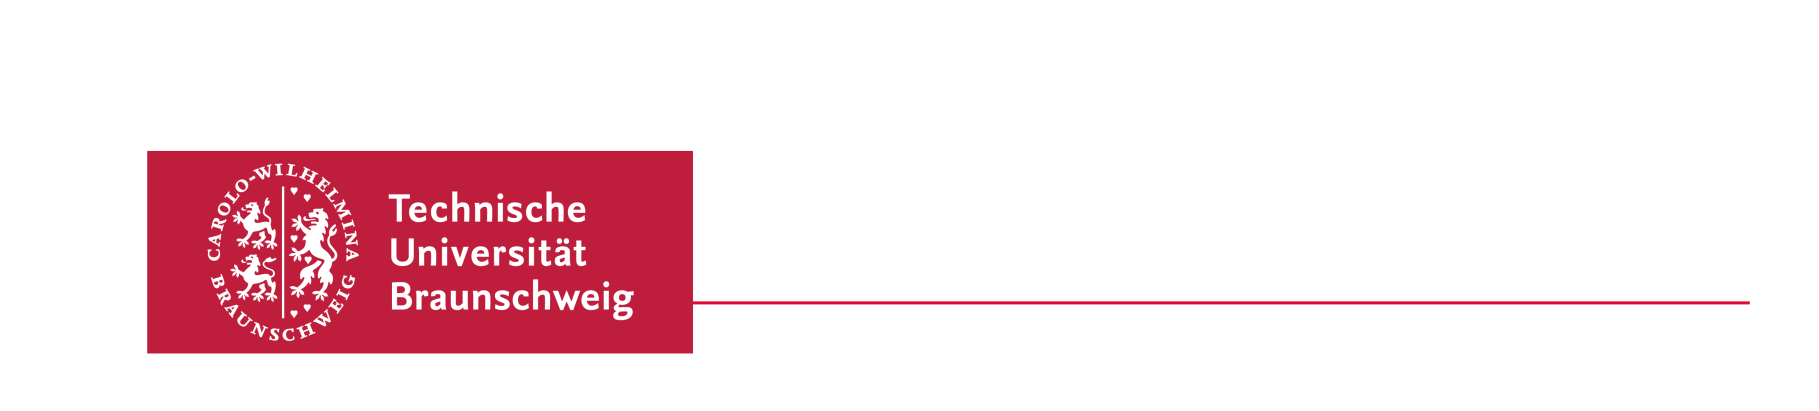

**Rechnerübung zur Signalübertragung II**

***Versuch 3: Leistungsdichtespektrum, Autokorrelationsfunktion***

**Hinweis**: Die Untersuchungen erfolgen in diesem Dokument numerisch an
Hand von Abtastwerten. Ein derartiges Vorgehen wird immer dann
verwendet, wenn in einem Rechner eine Systemsimulation durchgeführt
wird. Die Fouriertransformation wird beispielsweise durch einen
FFT-Algorithmus durchgeführt. Dieser erhält $N$ Abtastwerte und gibt
$2N$ Werte zurück (bei manchen anderen FFT-Algorithmen auch nur $N$).
Folgende Grafik, in der die Zusammenhänge zwischen Signalen und Spektren
im kontinuierlichen Fall und im abgetasteten Fall dargestellt sind, soll
helfen, die Berechnungsweise in dieser Matlab-Aufgabe zu verstehen.

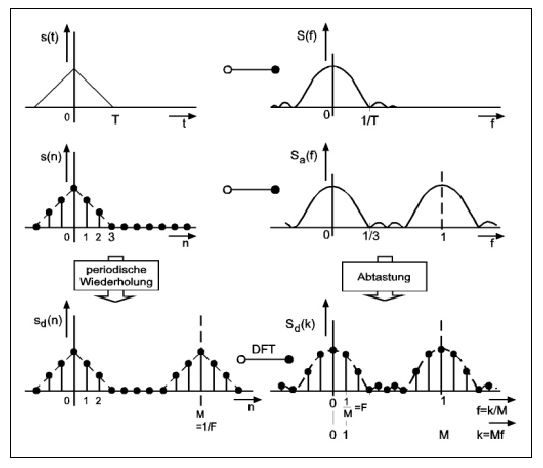

**  
**

**Teil 3.1 Berechnung der Autokorrelationsfunktion**

Weißes Rauschen wird auf einen idealen Bandpass der Bandbreite
$f_{\mathrm{\Delta}}$ und der Mittenfrequenz $f_{0}$ gegeben.

Zunächst einige Matlab-Definitionen:

Öffnen Sie die Datei „Versuch3.m“ und führen Sie das Programm aus.

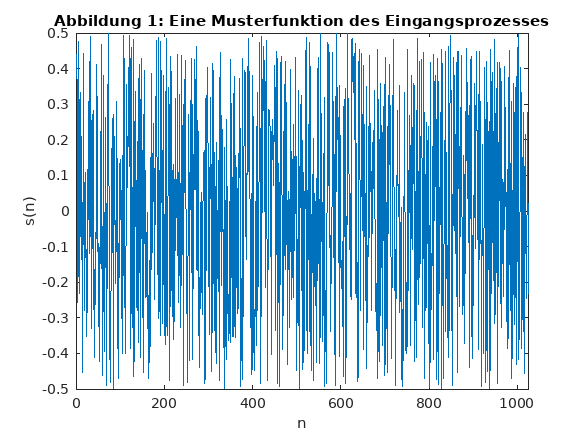

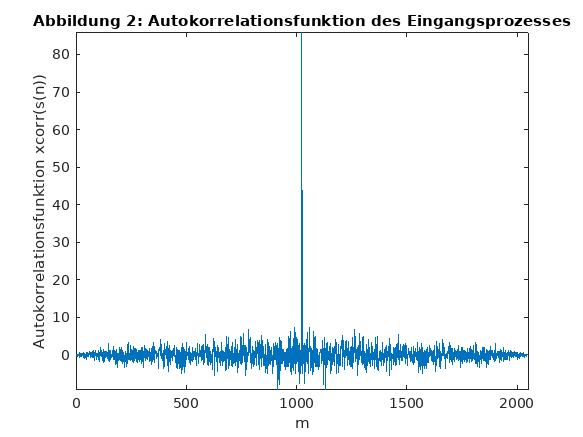

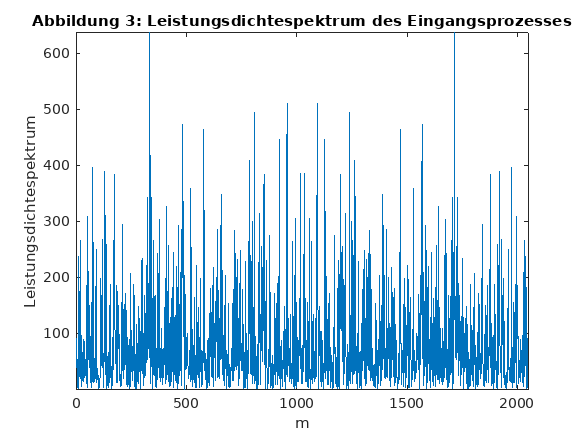

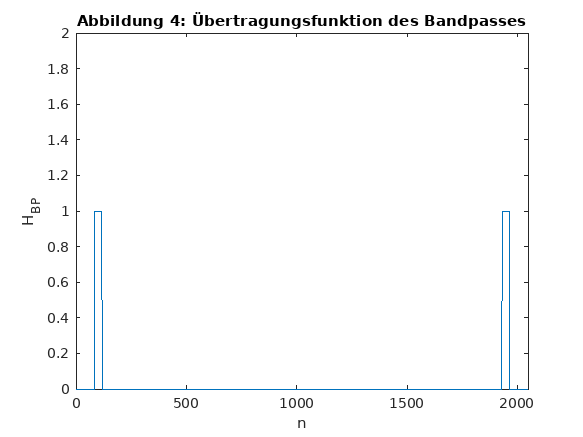

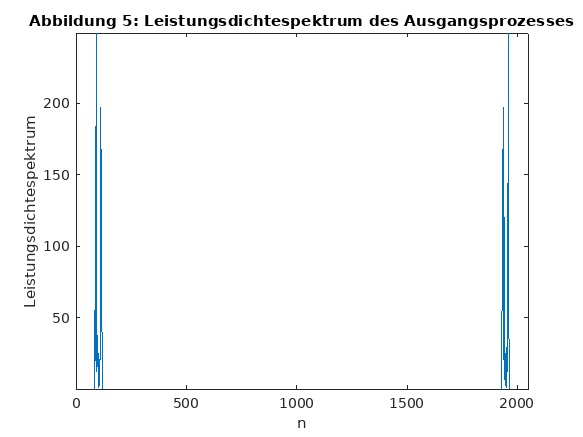

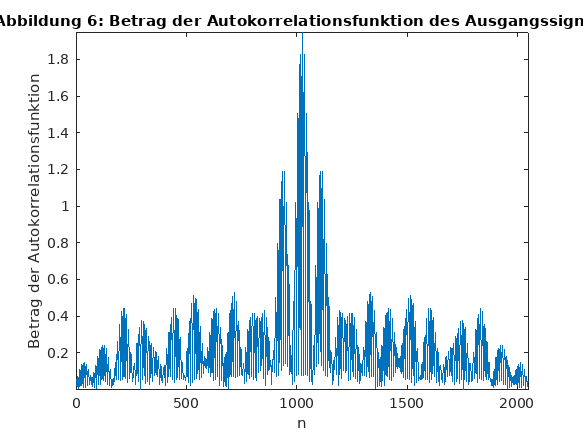

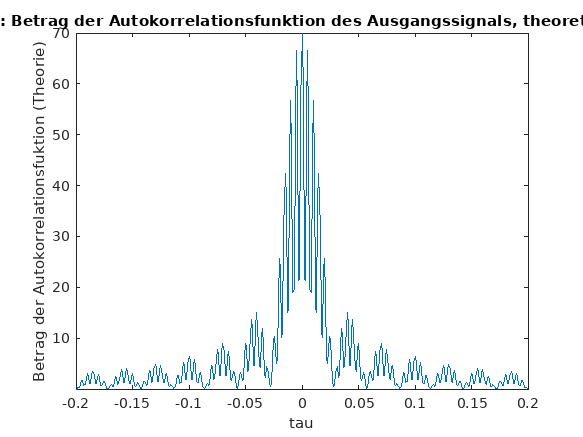

In [2]:
Versuch3;

In dem Matlab-Code können Sie die Anzahl der Messwerte ändern, indem Sie
den Wert für e ändern. In der Grundeinstellung: Anzahl der Messwerte:
$N = 2^{10}$

In [3]:
e = 10;
N = 2^e;

s = rand(1,N) - 0.5;

-   Erzeugung der Musterfunktion des Eingangsprozesses:
    $s = \text{rand}\left( 1,N \right) - 0.5$

Mit der Funktion $s = \text{rand}\left( 1,N \right) - 0.5$ erzeugt
Matlab einen Vektor mit $N$ Elementen, dessen Werte Abtastwerte eines
gleichverteilten, weißen Rauschprozesses sind.

“Figure 1“ zeigt eine Musterfunktion des Eingangsprozesses. Zunächst
soll die Autokorrelationsfunktion und auch das Leistungsdichtespektrum
des Eingangsprozesses bestimmt werden.

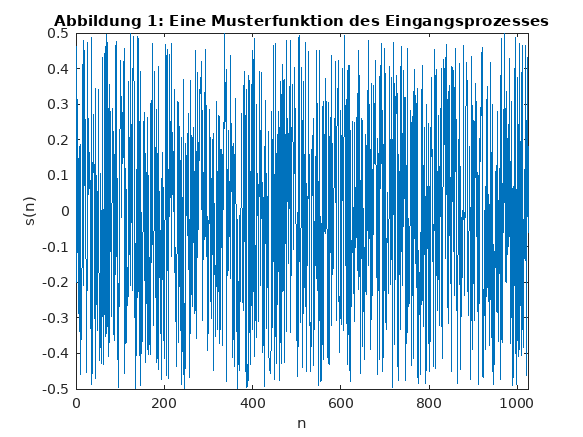

In [4]:
figure(1)
plot(s)
axis([0 N -0.5 0.5]);
title('Abbildung 1: Eine Musterfunktion des Eingangsprozesses')
xlabel('n')
ylabel('s(n)')

-   Bestimmung der Autokorrelationsfunktion:
    $\varphi_{\text{ss}} = \text{xcorr}(s)$

$$\Phi_{\text{ss}} = \text{abs}\left( \text{ffts}h\text{ift}\left( \text{fft}\left( \varphi_{\text{ss}},\ 2^{e + 1} \right) \right) \right)$$

-   Bereich der Werte: $0\ldots 2^{e + 1}$

“Figure 2“ zeigt den Verlauf der Autokorrelationsfunktion
$\varphi_{\text{ss}}$des Eingangsprozesses nach „Figure 1“.

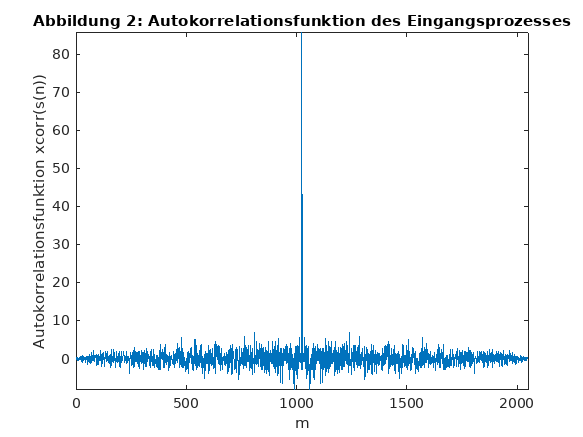

In [5]:
%  Autokorrelationsfunktion berechnen
Autocorr = xcorr(s);
figure(2)
plot(Autocorr)
axis([0 2.*N+1 min(Autocorr) max(Autocorr)]);
title('Abbildung 2: Autokorrelationsfunktion des Eingangsprozesses')
xlabel('m')
ylabel('Autokorrelationsfunktion xcorr(s(n))')

Die Autokorrelationsfunktion von weißem Rauschen ist nach der Theorie
gleich einem Dirac-Impuls zur Zeit $\tau = 0$, der mit der spektralen
Leistungsdichte $N_{0}$ multipliziert wird. „Figure 2“ zeigt einen
Impuls zum Zeitpunkt $\tau = 0$ in der Mitte des dargestellten
Bereiches. Der hier dargestellte Verlauf wurde aus der Musterfunktion
bestimmt.

Über eine FFT-Routine wurde oben das Leistungsdichtespektrum
Φ<sub>ss</sub> des Eingangsprozesses berechnet.Dieses ist in „Figure 3“
wiedergegeben.

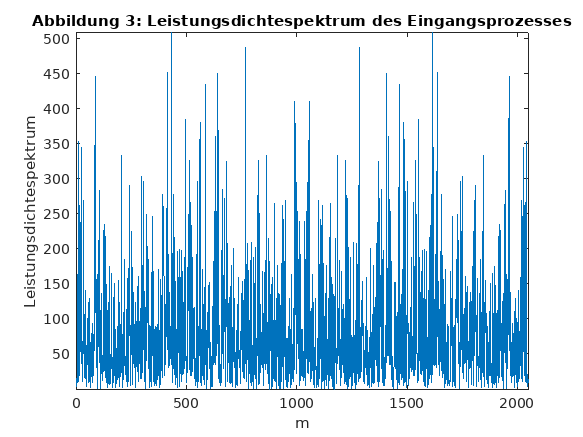

In [6]:
%  Leistungsdichtespektrum aus Autokorrelationsfunktion berechnen
Y = fftshift(fft(Autocorr,2^(e+1)));
psd_eingang = abs(Y);

%  plot(Pyy)
figure(3)
plot(psd_eingang);
axis([0 length(psd_eingang) min(psd_eingang) max(psd_eingang)]);
title('Abbildung 3: Leistungsdichtespektrum des Eingangsprozesses')
xlabel('m')
ylabel('Leistungsdichtespektrum')

Auf den ersten Blick fällt in „Figure 3“ auf, dass das
Leistungsdichtespektrum nicht konstant ist, was man der Theorie nach bei
weißem Rauschen nicht erwarten würde. Das liegt an der hier durch den
Parameter$N$zeitlich begrenzten Musterfunktion des Eingangsprozesses.
Würde man die Anzahl der Messwerte $N$ deutlich erhöhen, so würde das
Leistungsdichtespektrum einen immer gleichmäßigeren Verlauf annehmen.

Verändern Sie den Parameter $N$ auf einen höheren Wert (indem Sie in dem
Matlab-Code den Wert von e ändern) und betrachten Sie das
Leistungsdichtespektrum!

In [7]:
e = 22;
N = 2^e;

s = rand(1,N) - 0.5;
Autocorr = xcorr(s);
Y = fftshift(fft(Autocorr,2^(e+1)));
psd_eingang = abs(Y);

Sie werden sehen, dass das sich das Leistungsdichtespektrum immer weiter
einem konstanten Verlauf annähert. Sollten die Rechenzeiten zu lang
sein, können Sie die Berechnung durch Drücken von „Strg + C“ beenden.

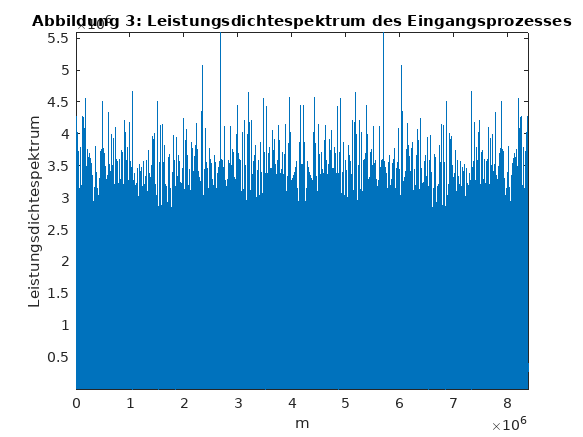

In [8]:
%  plot(Pyy)
figure(3)
plot(psd_eingang);
axis([0 length(psd_eingang) min(psd_eingang) max(psd_eingang)]);
title('Abbildung 3: Leistungsdichtespektrum des Eingangsprozesses')
xlabel('m')
ylabel('Leistungsdichtespektrum')

**Teil 3.2 Einfluss des Bandpasses**

In [9]:
e = 10;
N = 2^e;

s = rand(1,N) - 0.5;
Autocorr = xcorr(s);
Y = fftshift(fft(Autocorr,2^(e+1)));
psd_eingang = abs(Y);

Der untersuchte Eingangsprozess soll nun durch einen idealen Bandpass
mit der Mittenfrequenz $f_{0}$ und der Bandbreite $f_{\mathrm{\Delta}}$
übertragen werden. Dazu zunächst wieder einige Matlab-Definitionen:

-   Mittenfrequenz des Bandpasses: $f_{0} = f_{\text{mf}} = 100$

-   Bandbreite des Bandpasses:
    $f_{\mathrm{\Delta}} = f_{\text{bb}} = 35$

-   Dargestellter Bereich:
    $n = 1:\text{lengt}h\left( \Phi_{\text{ss}} \right)$

-   Übertragungsfunktion des Bandpasses:
    $H_{\text{BP}} = h_{\text{bp}} = \text{heaviside}\left( n - f_{\text{mf}} + \frac{f_{\text{bb}}}{2} \right) - h\text{eaviside}\left( n - f_{\text{mf}} - \frac{f_{\text{bb}}}{2} \right) + \text{heaviside}\left( n + f_{\text{mf}} + \frac{f_{\text{bb}}}{2} - 2^{e + 1} \right) - h\text{eaviside}(n + f_{\text{mf}} - \frac{f_{\text{bb}}}{2} - 2^{e + 1})$

($f_{\text{mf}}$, $f_{\text{bb}}$ und $h_{\text{bp}}$ sind die
entsprechenden Variablen-Namen in dem Matlab-Code.)

„Figure 4“ stellt die Übertragungsfunktion $H_{\text{BP}}$des Bandpasses
dar

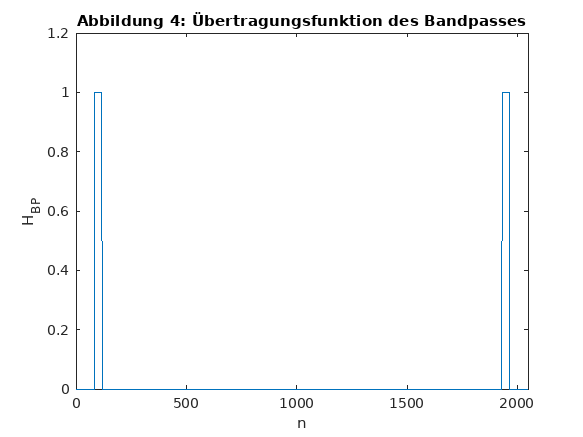

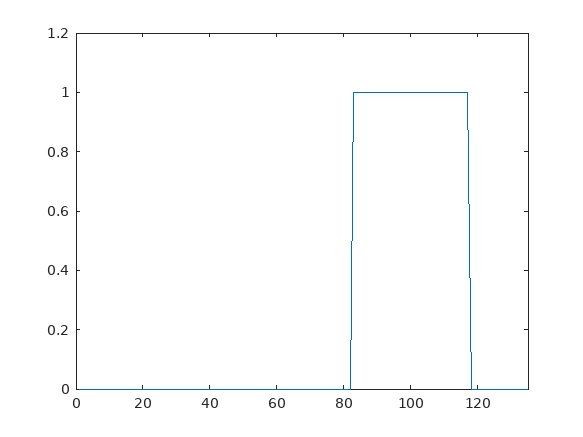

In [10]:
%  Dargestellter Bereich
n = 1:length(psd_eingang);

%  Übertragungsfunktion des Bandpasses
h_bp = heaviside(n-f_mf+f_bb/2)-heaviside(n-f_mf-f_bb/2)...
      +heaviside(n+f_mf+f_bb/2-2^(e+1))-heaviside(n+f_mf-f_bb/2-2^(e+1));
figure(4)
plot(n,h_bp);
axis([0 length(h_bp) 0 1.2]);
title('Abbildung 4: Übertragungsfunktion des Bandpasses')
xlabel('n')
ylabel('H_B_P')

% zoomed in
figure(1)
plot(n,h_bp);
%axis([f_mf-f_bb f_mf+f_bb 0 1.2]);
axis([0 f_mf+f_bb 0 1.2]);


Das Leistungsdichtespektrum des Ausgangsprozesses ist laut Theorie
gleich dem Produkt aus Energiedichtespektrum des Bandpasses und
Leistungsdichtespektrum des Eingangsprozesses:

-   Leistungsdichtespektrum des Ausgangsprozesses:
    $\Phi_{\text{gg}} = \Phi_{\text{ss}} \bullet {|H_{\text{BP}}|}^{2}$

„Figure 5“ stellt das Leistungsdichtespektrum $\Phi_{\text{gg}}$ des
Ausgangsprozesses dar

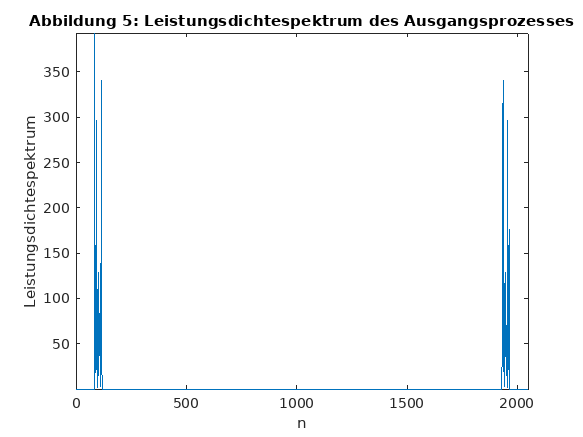

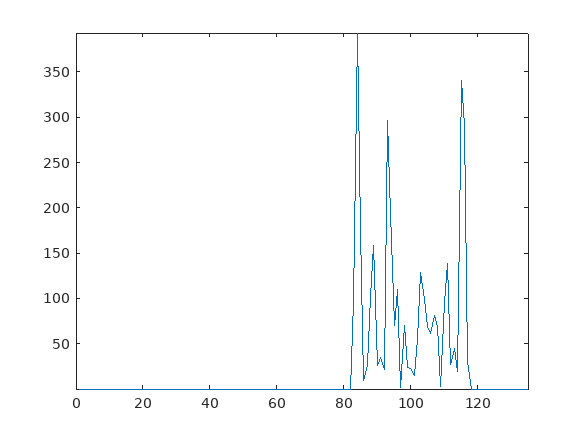

In [11]:
psd_ausgang = psd_eingang.*abs(h_bp).^2;
figure(5)
plot(psd_ausgang);
title('Abbildung 5: Leistungsdichtespektrum des Ausgangsprozesses')
axis([0 length(psd_eingang) min(psd_eingang) max(psd_ausgang)]);
xlabel('n')
ylabel('Leistungsdichtespektrum')

% zoomed in
figure(1)
plot(psd_ausgang);
%axis([f_mf-f_bb f_mf+f_bb min(psd_eingang) max(psd_ausgang)]);
axis([0 f_mf+f_bb min(psd_eingang) max(psd_ausgang)]);


Aus dem Leistungsdichtespektrum kann über die Fourier-Rücktransformation
die Autokorrelationsfunktion des Ausgangsprozesses bestimmt werden.

-   Berechnung der Autokorrelierten
    $\varphi_{\text{gg}} = |\text{ffts}h\text{ift}(\text{ifft}\left( \Phi_{\text{gg}} \right))|$

Die so berechnete Autokorrelationsfunktion $\varphi_{\text{gg}}$ ist
eine komplexe Funktion von $\tau$. Der Verlauf des Betrages ist in
„Figure 6“ dargestellt.

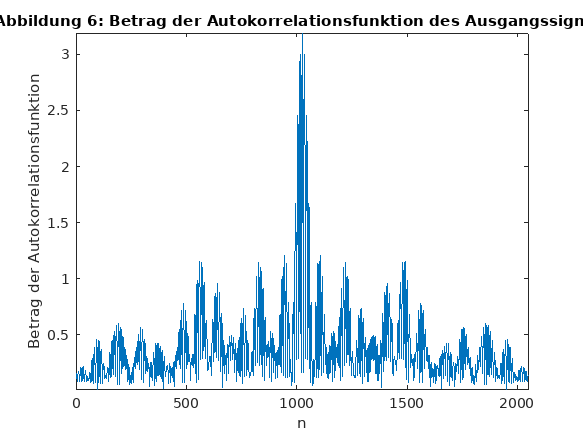

In [12]:
%  Autokorrelationsfunktion des Ausgangssignals
Autocorr_ausgang = abs(fftshift(ifft(psd_ausgang)));
figure(6)
plot(n,Autocorr_ausgang)
title('Abbildung 6: Betrag der Autokorrelationsfunktion des Ausgangssignals')
axis([0 length(Autocorr_ausgang) min(Autocorr_ausgang) max(Autocorr_ausgang)]);
xlabel('n')
ylabel('Betrag der Autokorrelationsfunktion')

„Figure 7“ zeigt dagegen den theoretischen Verlauf des Betrages der
Autokorrelationsfunktion. Die Gleichung für die Autokorrelationsfunktion
lässt sich recht einfach herleiten. Es ist:

-   Spektrale Leistungsdichte: $N_{0} = 1.0$

-   Autokorrelationsfunktion:
    $\varphi_{\text{gg}2}\left( \tau \right) = |N_{0} \bullet f_{\mathrm{\Delta}} \bullet \text{sinc}\left( f_{\mathrm{\Delta}} \bullet \tau \right) \bullet 2 \bullet \cos(2 \bullet \pi \bullet f_{0} \bullet \tau)|$

-   Dargestellter Zeitbereich: $\tau = - 0.2:0.001:0.2$

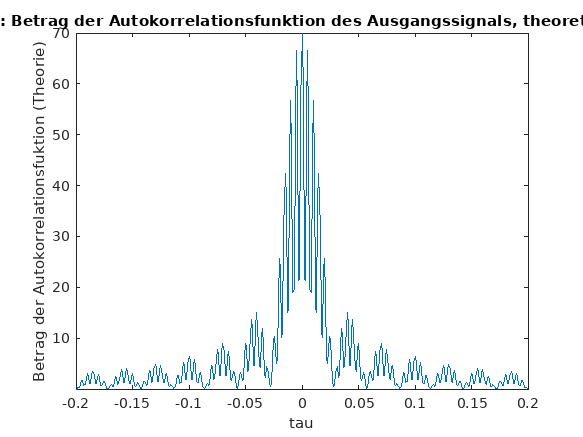

In [13]:
%  Autokorrelationsfunktion des Ausgangssignals (theorie)
%  Dargestellter Zeitbereich
tau = -0.2:0.001:0.2;

%  Spektrale Leistungsdichte
N0 = 1.0;

%  Autokorreationsfunktion
Autocorr_ausgang_theorie = abs(N0*f_bb*sinc(f_bb*tau)*2.*cos(2*pi*f_mf*tau));
figure(7)
plot(tau,Autocorr_ausgang_theorie)
title('Abbildung 7: Betrag der Autokorrelationsfunktion des Ausgangssignals, theoretischer Verlauf')
axis([-0.2 0.2 min(Autocorr_ausgang_theorie) max(Autocorr_ausgang_theorie)]);
xlabel('tau')
ylabel('Betrag der Autokorrelationsfuktion (Theorie)')

Beschreiben Sie die beiden Verläufe der Autokorrelationsfunktion. Woher
kommen die Unterschiede? (Anmerkung: Sie können sich auch einen
Ausschnitt eines Diagramms genauer anschauen mit dem „Zoom In“-Tool.)

Der Eingangsprozess wird nun gleichzeitig auf einen Tiefpass der
Grenzfrequenz $f_{g} \leq f_{0} - \frac{f_{\mathrm{\Delta}}}{2}$gegeben.
Wie lautet die Kreuzkorrelationsfunktion zwischen den Ausgangsprozessen
des Tief- und Bandpasses?

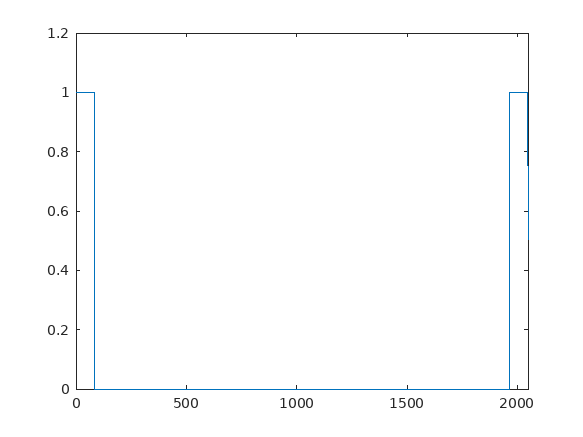

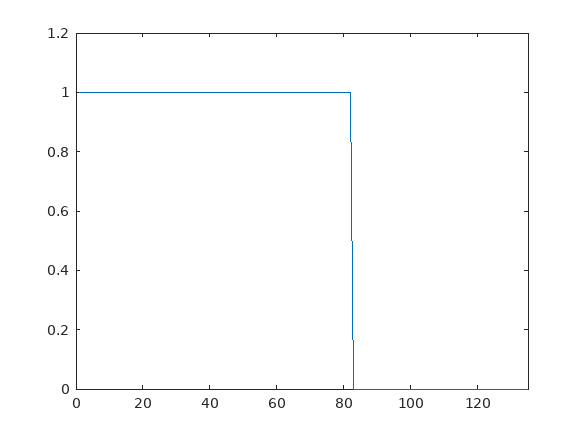

In [14]:
%  Übertragungsfunktion des Tiefpass
h_tp = heaviside(n-0)-heaviside(n-(f_mf-f_bb/2))...
      +heaviside(n-(2^(e+1)-f_mf+f_bb/2))-heaviside(n-(2^(e+1)));
figure(1)
plot(h_tp)
axis([0 length(h_tp) 0 1.2]);
figure(2)
plot(h_tp)
axis([0 f_mf+f_bb 0 1.2]);

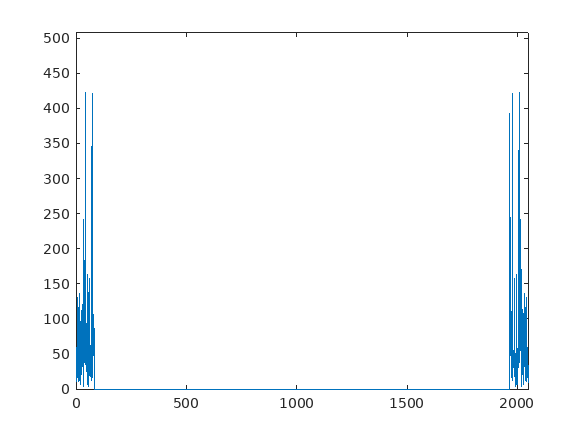

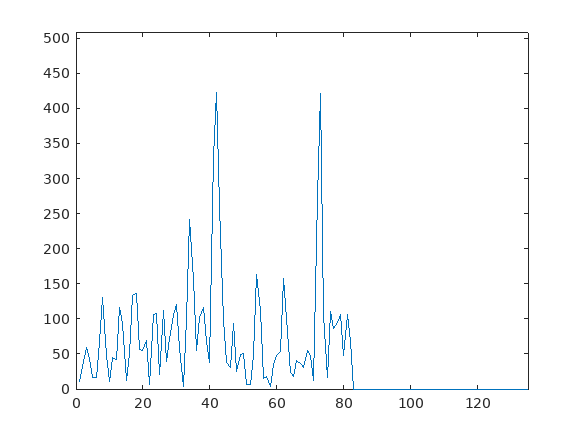

In [15]:
figure(1)
psd_ausgang_tp = psd_eingang.*abs(h_tp).^2;
plot(psd_ausgang_tp)
axis([0 length(h_tp) 0 1.2*max(psd_ausgang_tp)]);
figure(2)
plot(psd_ausgang_tp)
axis([0 f_mf+f_bb 0 1.2*max(psd_ausgang_tp)]);

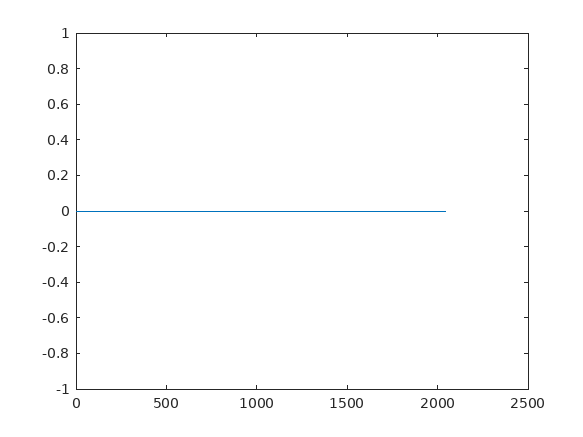

In [35]:
%time_bp = abs(fftshift(ifft(psd_ausgang)));
%time_tp = abs(fftshift(ifft(psd_ausgang_tp)));
%xc = xcorr(ifft(psd_ausgang), ifft(psd_ausgang_tp));
%plot(time_bp)
%figure(2)
%plot(time_tp)
%figure(3)
%plot(abs(xc))
%axis([0 length(xc) 0 1.2*max(xc)]);
plot(abs(fftshift(ifft(psd_ausgang.*psd_ausgang_tp))))